# Missing Data

You can remove the entire data point but in production its not much used<br/>

# Imputation Methods

-Mean/Median<br/>
-KNN (knn is slow)<br/>
-Regression Model<br/>

# Dropping Columns

In [5]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_iris
data=load_iris()

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,stratify=data.target)
nan_columns=np.any(np.isnan(X_train),axis=0)
X_drop=X_train[:,~nan_columns]
scores=cross_val_score(LogisticRegressionCV(cv=5,max_iter=100000),X_drop,y_train,cv=10)
np.mean(scores)

0.9636363636363636

# Mean/Median

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="median").fit(X_train)
X_median_imp=imp.transform(X_train)

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
nan_columns=np.any(np.isnan(X_train),axis=0)
X_drop=X_train[:,~nan_columns]
pipe=make_pipeline(StandardScaler(),LogisticRegressionCV(max_iter=100000))
scores=cross_val_score(pipe,X_drop,y_train,cv=10)
np.mean(scores)

0.9727272727272727

In [22]:
mean_pipe=make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),LogisticRegressionCV(max_iter=1000))
scores=cross_val_score(mean_pipe,X_train,y_train,cv=10)
np.mean(scores)

0.9727272727272727

# KNN imputation

In [23]:
from sklearn.impute import KNNImputer

In [30]:
knn_pipe=make_pipeline(KNNImputer(),StandardScaler(),LogisticRegressionCV(max_iter=1000))

In [31]:
scores=cross_val_score(knn_pipe,X_train,y_train,cv=10)
np.mean(scores)

0.9727272727272727

# Model-Driven Imputation

In [45]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_imp=IterativeImputer(RandomForestRegressor())
rf_pipe=make_pipeline(rf_imp,StandardScaler(),LogisticRegressionCV(max_iter=1000))
scores=cross_val_score(rf_pipe,X_train,y_train,cv=10)
np.mean(scores)

0.9727272727272727

# Polynomial Features

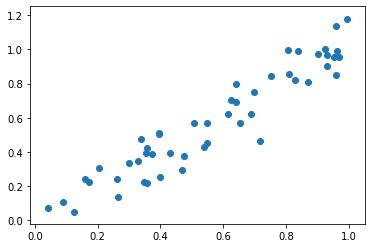

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X=np.random.uniform(size=50)
y=X+np.random.normal(0,.1,size=50)
X=X.reshape(-1, 1)
Y=y.reshape(-1, 1)
plt.scatter(X,y)

In [54]:
poly_lr=make_pipeline(PolynomialFeatures(include_bias=False),LinearRegression())


In [92]:
poly_lr.fit(X,Y)
y_pred=poly_lr.predict(X)
plt.plot(X,Y,'o')
plt.show()
plt.plot(X,y_pred)

poly_lr.score(X,Y)

ValueError: Found input variables with inconsistent numbers of samples: [150, 50]

# Linear Models

In [75]:
from sklearn.datasets import load_boston
data=load_boston()


In [76]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet

In [77]:
from sklearn.pipeline import make_pipeline

In [78]:
from sklearn.preprocessing import StandardScaler

In [88]:
pipe=make_pipeline(PolynomialFeatures(include_bias=False),StandardScaler(),LinearRegression())

In [80]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [81]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,random_state=0)

In [73]:
scores=cross_val_score(pipe,X_train,y_train,cv=10)
print(np.mean(scores))

0.7638204947732146


In [63]:
pipe1=make_pipeline(PolynomialFeatures(include_bias=False),StandardScaler(),Ridge())
scores=cross_val_score(pipe1,X_train,y_train,cv=10)
print(np.mean(scores))

0.8216999248203762


# TranformTarget

In [86]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
log_regressor=TransformedTargetRegressor(LinearRegression(),func=np.log,inverse_func=np.exp)
scores=cross_val_score(make_pipeline(log_regressor),X_train,y_train,cv=10)
print(np.mean(scores))

0.7823607294047902


# Ridge

In [67]:
param_grid={"alpha":np.logspace(-3,3,13)}
print(param_grid)

{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [77]:
grid=GridSearchCV(Ridge(),param_grid,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
grid.predict(X_test)

array([24.89121203, 23.62630494, 29.14780236, 11.9635427 , 21.38690533,
       19.60541154, 20.37274753, 21.40994922, 18.90757431, 20.00185101,
        4.89351639, 16.0516806 , 16.94585931,  5.33586162, 39.87112054,
       32.31369945, 22.25342305, 36.55300616, 31.0619236 , 23.4304715 ,
       24.8309365 , 24.24954547, 20.76432375, 30.3933596 , 22.51251289,
        9.85170462, 17.80216497, 18.09167084, 35.72473271, 20.83811105,
       18.03279357, 17.68463399, 19.65328256, 23.73175362, 29.04442292,
       19.32701008, 10.98208036, 24.59838834, 17.27956096, 15.11291133,
       25.99395121, 20.93803852, 22.18454909, 15.23462275, 22.76652742,
       25.15656037, 19.59679189, 22.83775749,  9.77633037, 24.53198651,
       20.86216768, 17.37819733, 24.41583685, 30.13616152, 13.35602216,
       21.65265845, 20.5481738 , 15.21544305, 13.71734796, 21.99844047,
       17.48124175, 21.51760238, 32.86795277, 31.34166797, 17.5953794 ,
       32.7337209 , 18.56322115, 19.40897122, 18.77529924, 23.03

In [79]:
grid.best_params_

{'alpha': 0.03162277660168379}

In [80]:
grid.best_score_

0.7160075458496223

In [84]:
rigde100=Ridge(alpha=100).fit(X_train,y_train)
rigde1=Ridge(alpha=1).fit(X_train,y_train)
rigde14=Ridge(alpha=14).fit(X_train,y_train)

In [85]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

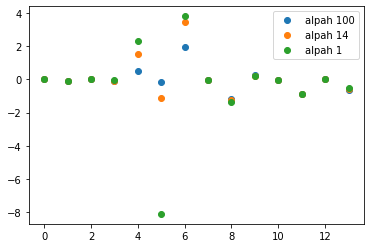

In [87]:
plt.plot(rigde100.coef_,"o",label="alpah 100")
plt.plot(rigde14.coef_,"o",label="alpah 14")
plt.plot(rigde1.coef_,"o",label="alpah 1")
plt.legend()

# Lasso Regression

understand l1 and l2 penalty

In [92]:
param_grid={"alpha":np.logspace(-3,0,13)}
grid=GridSearchCV(Lasso(normalize=True),param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_score_

0.7162758903829134

# Elastic Net

In [98]:
param_grid={"alpha":np.logspace(-4,-1,10),
            "l1_ratio":[0.01,.1,.5,.9,.98,1]}
grid=GridSearchCV(ElasticNet(),param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_score_

0.7160093062944513

In [100]:
grid.best_params_



{'alpha': 0.001, 'l1_ratio': 0.98}

In [103]:
import pandas as pd
res=pd.pivot_table(pd.DataFrame(grid.cv_results_),
                  values="mean_test_score",index="param_alpha",columns="param_l1_ratio")